In [1]:
#################################################################################################################
# Hult International Business School Data Science: Python 19-20
# Professor Kusterer
#
# Team 11 members: Tuba Ali
#                  Sophie Briques
#                  Juan Duran
#                  Tien Nguyen
#                  Xiaowen Wang
#################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import math
group_by = 'Hult Region'

#IMPORT THE RAW EXCEL FILE -----------------------------------------------------------------------------------------
sheetname = 'Raw'
activefile = "WDIW Dataset.xlsx"
rawdata = pd.read_excel(activefile,sheet_name=sheetname)

#We removed Togo because it's not in our assigned region under 'Cool Name' but it also shows "Sub-Saharan" as its region
rawdata.drop(rawdata.index[rawdata['Country Name'] == 'Togo'], inplace = True)

raw_copy = pd.DataFrame.copy(rawdata)

####################################################################################################################
#-------------------------------------START USER-DEFINED FUNCTION CODE BLOCK----------------------------------------
####################################################################################################################

#HISTOGRAM PLOTS FOR MULTIPLE INDICATORS ----------------------------------------------------------------------
def plotmultiplehist(plotlist,binsize):
    """Pass FIRST the list for indicators to plot multiple histograms
            SECOND specify binsize as int or str"""
    i = 1
    for listitem in plotlist:
        plt.hist(listitem,data = indicatordata,bins=binsize)
        plt.title(indicatordict[listitem]['Indicator Name'])
        plt.show()
        i += 1

#BOXPLOTS FOR MULTIPLE INDICATORS ------------------------------------------------------------------------------
def plotmultiplebox(plotlist):
    """Pass the list of indicators to plot multiple box plots"""
    i = 1
    for listitem in plotlist:
        indicatordata.boxplot(listitem)
        plt.title(indicatordict[listitem]['Indicator Name'])
        plt.show()
        i += 1

#STACKEDBAR PLOT FOR THREE INDICATORS -------------------------------------------------------------------------
def plotstackedbar(variablelist,labellist,subdata,xlabel):
    """ https://python-graph-gallery.com/13-percent-stacked-barplot/ 
    Only works for THREE variables
    
    FIRST pass list of variables
    SECOND pass list of appropriate label
    THIRD pass dataframe of the subdata
    FOURTH pass xlabel as str
    
    
    RETURN plot as a plot object."""

    print(subdata[variablelist[0]])
    # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(subdata[variablelist[0]], subdata[variablelist[1]], subdata[variablelist[2]])]
    greenBars = [i / j * 100 for i,j in zip(subdata[variablelist[0]], totals)]
    orangeBars = [i / j * 100 for i,j in zip(subdata[variablelist[1]], totals)]
    blueBars = [i / j * 100 for i,j in zip(subdata[variablelist[2]], totals)]

    r = list(range(0, len(labellist)))
    barWidth = 0.85

    # Create green Bars
    plot = plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
    # Create orange Bars
    plot = plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
    # Create blue Bars
    plot = plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

    # Add a legend
    #plot = plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
    plot = plt.legend((greenBars, orangeBars, blueBars), ('label1', 'label2', 'label3'), loc='upper right')

    # Custom x axis
    plot = plt.xticks(r, labellist,rotation='vertical')
    plot = plt.xlabel(xlabel)
    return(plot)

#FIND OUTLIERS ------------------------------------------------------------------------------------------
# applying quantile on features of interest
def findoutliers(df,indicator,category,categoryval):
    """Find outliers based on dataframe, indicator, category"""
    IQRlist = df[indicator].quantile([0.25,0.75]).values.tolist()
    IQR = IQRlist[1] - IQRlist[0]
    LB = IQRlist[1] - 1.5*IQR
    UB = IQRlist[0] + 1.5*IQR
    lowoutliers = sub_africafull[sub_africafull[category]==categoryval][sub_africafull[indicator]<LB]
    highoutliers = sub_africafull[sub_africafull[category]==categoryval][sub_africafull[indicator]>UB]
    lowoutliers = lowoutliers[['Country Name',indicator,category]]
    highoutliers = highoutliers[['Country Name',indicator,category]]
    lowoutliers.columns = ['Country Name','Low outliers value',category]
    highoutliers.columns = ['Country Name','High outliers value',category]
    return(lowoutliers,highoutliers)

# applying quantile on features of interest (no category)
def findoutliers1(df,indicator):
    """Find outliers based on dataframe and indicator ONLY"""
    IQRlist = df[indicator].quantile([0.25,0.75]).values.tolist()
    IQR = IQRlist[1] - IQRlist[0]
    LB = IQRlist[1] - 1.5*IQR
    UB = IQRlist[0] + 1.5*IQR
    lowoutliers = sub_africafull[sub_africafull[indicator]<LB]
    highoutliers = sub_africafull[sub_africafull[indicator]>UB]
    lowoutliers = lowoutliers[['Country Name',indicator,'Income Group']]
    highoutliers = highoutliers[['Country Name',indicator,'Income Group']]
    lowoutliers.columns = ['Country Name','Low outliers value','Income Group']
    highoutliers.columns = ['Country Name','High outliers value','Income Group']
    return(lowoutliers,highoutliers)

####################################################################################################################
#-------------------------------------END USER-DEFINED FUNCTION CODE BLOCK------------------------------------------
####################################################################################################################


#DICTIONARY FOR INDICATOR -------------------------------------------------------------------------------------
indicatordict = {'ATE':{'Indicator Name':'Access to electricity (% of population)','Category':'Environment','SubCategory':'Energy production & use','Detail':''},
'ATER':{'Indicator Name':'Access to electricity, rural (% of rural population)','Category':'Environment','SubCategory':'Energy production & use','Detail':''},
'ATEU':{'Indicator Name':'Access to electricity, urban (% of urban population)','Category':'Environment','SubCategory':'Energy production & use','Detail':''},
'AFR':{'Indicator Name':'Adolescent fertility rate (births per 1,000 women ages 15-19)','Category':'Health','SubCategory':'Reproductive health','Detail':''},
'ADR':{'Indicator Name':'Age dependency ratio (% of working-age population)','Category':'Health','SubCategory':'Population','Detail':'Dynamics'},
'ADRO':{'Indicator Name':'Age dependency ratio, old (% of working-age population)','Category':'Health','SubCategory':'Population','Detail':'Dynamics'},
'ADRY':{'Indicator Name':'Age dependency ratio, young (% of working-age population)','Category':'Health','SubCategory':'Population','Detail':'Dynamics'},
'AGR':{'Indicator Name':'Agriculture, value added (% of GDP)','Category':'Economic Policy & Debt','SubCategory':'National accounts','Detail':'Shares of GDP & other'},
'AFP':{'Indicator Name':'Armed forces personnel (% of total labor force)','Category':'Public Sector','SubCategory':'Defense & arms trade','Detail':''},
'BRC':{'Indicator Name':'Birth rate, crude (per 1,000 people)','Category':'Health','SubCategory':'Population','Detail':'Dynamics'},
'BASHS':{'Indicator Name':'Births attended by skilled health staff (% of total)','Category':'Health','SubCategory':'Reproductive health','Detail':''},
'DRC':{'Indicator Name':'Death rate, crude (per 1,000 people)','Category':'Health','SubCategory':'Population','Detail':'Dynamics'},
'EAD':{'Indicator Name':'Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'EAB':{'Indicator Name':'Educational attainment, at least Bachelors or equivalent, population 25+, total (%) (cumulative)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'EAM':{'Indicator Name':'Educational attainment, at least Masters or equivalent, population 25+, total (%) (cumulative)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'EALS':{'Indicator Name':'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'EAPS':{'Indicator Name':'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'EAP':{'Indicator Name':'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'EASCT':{'Indicator Name':'Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'EAUS':{'Indicator Name':'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'EAGR':{'Indicator Name':'Employment in agriculture (% of total employment) (modeled ILO estimate)','Category':'Social Protection & Labor','SubCategory':'Economic activity','Detail':''},
'EIND':{'Indicator Name':'Employment in industry (% of total employment) (modeled ILO estimate)','Category':'Social Protection & Labor','SubCategory':'Economic activity','Detail':''},
'ESVC':{'Indicator Name':'Employment in services (% of total employment) (modeled ILO estimate)','Category':'Social Protection & Labor','SubCategory':'Economic activity','Detail':''},
'FR':{'Indicator Name':'Fertility rate, total (births per woman)','Category':'Health','SubCategory':'Reproductive health','Detail':''},
'GDP':{'Indicator Name':'GDP (current US$)','Category':'Economic Policy & Debt','SubCategory':'National accounts','Detail':'US$ at current prices'},
'GDPG':{'Indicator Name':'GDP growth (annual %)','Category':'Economic Policy & Debt','SubCategory':'National accounts','Detail':'Growth rates'},
'GINI':{'Indicator Name':'GINI index (World Bank estimate)','Category':'Poverty','SubCategory':'Income distribution','Detail':''},
'GEE':{'Indicator Name':'Government expenditure on education, total (% of government expenditure)','Category':'Education','SubCategory':'Inputs','Detail':''},
'IS42':{'Indicator Name':'Income share held by fourth 20%','Category':'Poverty','SubCategory':'Income distribution','Detail':''},
'ISH2':{'Indicator Name':'Income share held by highest 20%','Category':'Poverty','SubCategory':'Income distribution','Detail':''},
'ISL2':{'Indicator Name':'Income share held by lowest 20%','Category':'Poverty','SubCategory':'Income distribution','Detail':''},
'IS22':{'Indicator Name':'Income share held by second 20%','Category':'Poverty','SubCategory':'Income distribution','Detail':''},
'IS32':{'Indicator Name':'Income share held by third 20%','Category':'Poverty','SubCategory':'Income distribution','Detail':''},
'IV':{'Indicator Name':'Industry, value added (% of GDP)','Category':'Economic Policy & Debt','SubCategory':'National accounts','Detail':'Shares of GDP & other'},
'LE':{'Indicator Name':'Life expectancy at birth, total (years)','Category':'Health','SubCategory':'Mortality','Detail':''},
'LRA':{'Indicator Name':'Literacy rate, adult total (% of people ages 15 and above)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'LRY':{'Indicator Name':'Literacy rate, youth total (% of people ages 15-24)','Category':'Education','SubCategory':'Outcomes','Detail':''},
'MT':{'Indicator Name':'Merchandise trade (% of GDP)','Category':'Private Sector & Trade','SubCategory':'Total merchandise trade','Detail':''},
'ME':{'Indicator Name':'Military expenditure (% of GDP)','Category':'Public Sector','SubCategory':'Defense & arms trade','Detail':''},
'MCS':{'Indicator Name':'Mobile cellular subscriptions (per 100 people)','Category':'Infrastructure','SubCategory':'Communications','Detail':''},
'POV31':{'Indicator Name':'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure','Category':'Health','SubCategory':'Universal Health Coverage','Detail':''},
'POP14':{'Indicator Name':'Population ages 0-14 (% of total population)','Category':'Health','SubCategory':'Population','Detail':'Structure'},
'POP64':{'Indicator Name':'Population ages 15-64 (% of total population)','Category':'Health','SubCategory':'Population','Detail':'Structure'},
'POP65A':{'Indicator Name':'Population ages 65 and above (% of total population)','Category':'Health','SubCategory':'Population','Detail':'Structure'},
'POPD':{'Indicator Name':'Population density (people per sq. km of land area)','Category':'Environment','SubCategory':'Density & urbanization','Detail':''},
'POPG':{'Indicator Name':'Population growth (annual %)','Category':'Health','SubCategory':'Population','Detail':'Dynamics'},
'POPLC':{'Indicator Name':'Population in the largest city (% of urban population)','Category':'Environment','SubCategory':'Density & urbanization','Detail':''},
'POPS':{'Indicator Name':'Population living in slums (% of urban population)','Category':'Environment','SubCategory':'Density & urbanization','Detail':''},
'POPF':{'Indicator Name':'Population, female','Category':'Health','SubCategory':'Population','Detail':'Structure'},
'POPM':{'Indicator Name':'Population, male','Category':'Health','SubCategory':'Population','Detail':'Structure'},
'POP':{'Indicator Name':'Population, total','Category':'Health','SubCategory':'Population','Detail':'Structure'},
'POV19':{'Indicator Name':'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)','Category':'Poverty','SubCategory':'Poverty rates','Detail':''},
'POV32':{'Indicator Name':'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)','Category':'Poverty','SubCategory':'Poverty rates','Detail':''},
'POVNAT':{'Indicator Name':'Poverty headcount ratio at national poverty lines (% of population)','Category':'Poverty','SubCategory':'Poverty rates','Detail':''},
'PHIV':{'Indicator Name':'Prevalence of HIV, total (% of population ages 15-49)','Category':'Health','SubCategory':'Risk factors','Detail':''},
'PUN':{'Indicator Name':'Prevalence of undernourishment (% of population)','Category':'Health','SubCategory':'Nutrition','Detail':''},
'PUW':{'Indicator Name':'Prevalence of underweight, weight for age (% of children under 5)','Category':'Health','SubCategory':'Nutrition','Detail':''},
'POPR':{'Indicator Name':'Rural population (% of total population)','Category':'Environment','SubCategory':'Density & urbanization','Detail':''},
'SVCVA':{'Indicator Name':'Services, value added (% of GDP)','Category':'Economic Policy & Debt','SubCategory':'National accounts','Detail':'Shares of GDP & other'},
'SA':{'Indicator Name':'Surface area (sq. km)','Category':'Environment','SubCategory':'Land use','Detail':''},
'TR':{'Indicator Name':'Tax revenue (% of GDP)','Category':'Public Sector','SubCategory':'Government finance','Detail':'Revenue'},
'POPU':{'Indicator Name':'Urban population (% of total population)','Category':'Environment','SubCategory':'Density & urbanization','Detail':''},
'POPUG':{'Indicator Name':'Urban population growth (annual %)','Category':'Environment','SubCategory':'Density & urbanization','Detail':''}}

####################################################################################################################
#-------------------------------------START MAIN CODE BLOCK--------------------------------------------------------#
####################################################################################################################

#GET SUB-SAHARAN AFRICA DATA ---------------------------------------------------------------------------------------
#indicatorlist contains all short names for indicators
indicatorlist = ['ATE','ATER','ATEU','AFR','ADR','ADRO','ADRY','AGR','AFP','BRC','BASHS','DRC','EAD','EAB','EAM','EALS','EAPS','EAP','EASCT','EAUS','EAGR','EIND','ESVC','FR','GDP','GDPG','GINI','GEE','IS42','ISH2','ISL2','IS22','IS32','IV','LE','LRA','LRY','MT','ME','MCS','POV31','POP14','POP64','POP65A','POPD','POPG','POPLC','POPS','POPF','POPM','POP','POV19','POV32','POVNAT','PHIV','PUN','PUW','POPR','SVCVA','SA','TR','POPU','POPUG']
headerlist = ['Country Code','Country Name','Hult Region','Cool Name','ATE','ATER','ATEU','AFR','ADR','ADRO','ADRY','AGR','AFP','BRC','BASHS','DRC','EAD','EAB','EAM','EALS','EAPS','EAP','EASCT','EAUS','EAGR','EIND','ESVC','FR','GDP','GDPG','GINI','GEE','IS42','ISH2','ISL2','IS22','IS32','IV','LE','LRA','LRY','MT','ME','MCS','POV31','POP14','POP64','POP65A','POPD','POPG','POPLC','POPS','POPF','POPM','POP','POV19','POV32','POVNAT','PHIV','PUN','PUW','POPR','SVCVA','SA','TR','POPU','POPUG']

#GET THE RAW DATA AND REPLACE THE COLUMN HEADERS WITH SHORT NAMES AND INDEX WITH COUNTRY CODE------------------------
sub_africa = pd.DataFrame.copy(rawdata[rawdata['Cool Name']=='Sideswipe'])
originalindex = sub_africa.index.tolist()
countrycodelist = sub_africa.iloc[:,0].values.tolist()
sub_africa.columns = headerlist
#Replace index of sub_africa to the country code --------------------------------------------------------------
sub_africa.index = countrycodelist
sub_africa = sub_africa.sort_values('Country Code', ascending=1)

#ADD MISSING DATA FROM WORLD BANK FOR INCOME, TAX REV, POVERTY and GINI-------------------------------------------
sub_africa.loc[:,'ISL2'] = [5.4,3.2,8.3,3.3,5.7,4.5,5.5,4.5,5,6,4.7,7.6,7.4,4.5,np.NaN,7.2,7,5.4,6.1,7.9,8.4,5.4]
sub_africa.loc[:,'IS22'] = [9.6,9.6,11.7,7,10.2,8.5,10,9.1,8.7,10.8,9.6,12.2,11.6,8.3,np.NaN,11.6,11.2,9.7,10.3,11.9,12.7,9.8]
sub_africa.loc[:,'IS32'] = [14.5,14.2,15,11.1,14.6,13.7,14.5,13.9,13,15.7,14.8,16.4,15.7,12.2,np.NaN,16,15.1,14.4,15,15.8,16.8,13.3]
sub_africa.loc[:,'IS42'] = [21.9,20.8,20.6,17.7,21.6,21.6,21.6,22.2,20,23,22.3,22.4,21.8,18.3,np.NaN,22.3,20.6,21.6,21.7,21.9,22.6,18.4]
sub_africa.loc[:,'ISH2'] = [48.5,52.1,44.3,60.9,47.8,51.7,48.4,50.4,53.3,44.4,48.6,41.5,43.6,56.7,np.NaN,42.8,46.2,49,46.9,42.4,39.5,53]
sub_africa.loc[:,'TR'] = [25.65014974,np.NaN,15.37169965,8.28435089,15.44802829,12.77587041,np.NaN,np.NaN,20.90676315,11.46806371,18.26215239,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,18.62170749,np.NaN,np.NaN,np.NaN,np.NaN,28.06605578]
sub_africa.loc[:,'POV19'] = [30.1,49.5,43.7,66.3,28.2,23.8,76.6,17.9,8.1,3.4,13.3,35.3,10.1,67.1,np.NaN,40.9,0.5,53.5,38,52.2,32.3,1.1]
sub_africa.loc[:,'POV32'] = [55.7,76.2,76.4,83.1,57.4,44.7,91,37.5,26.5,13.3,30.5,70.3,37.8,84.5,np.NaN,72.6,3,77.6,67.5,81.3,70.1,2.5]
sub_africa.loc[:,'POVNAT'] = [36.6,40.1,40.1,62,46.3,37.5,63.9,42.4,46,33.4,23.4,55.2,48.6,69.3,np.NaN,50.9,7.9,46,46.7,52.9,66.2,39.3]
sub_africa.loc[:,'GINI'] = [42.7,47.8,35.3,56.2,41.5,46.6,42.1,45.3,47.2,38,43.5,33.7,35.9,50.7,np.NaN,35.3,38.5,43,40.3,34,30.8,46.8]
sub_africa.loc[:,'PUW'] = [19,18,19.2,23.5,12.8,14.8,23.4,16.9,11.8,6.5,11,18.3,16.4,17,5.6,15.3,13,31.5,13.5,18.1,8.8,3.6]
sub_africa.loc[:,'BASHS'] = [49.6,77.2,79.8,40,73.6,64.7,80.1,82.2,95.6,89.3,70.8,62.7,57.2,45,68.3,61.1,99.8,40.3,59.1,59.7,92.5,99]
sub_africa.loc[:,'POV31'] = [555000,153000,140000,np.NaN,652000,413000,64000,np.NaN,1000,16000,np.NaN,164000,np.NaN,np.NaN,np.NaN,22000,np.NaN,5606000,188000,67000,np.NaN,np.NaN]

#ADD MISSING EMPLOYMENT IN AGR, IND AND SVC FOR SEYCHELLES INTERPOLATION ON MAURITIUS------------------------------
sub_africa.loc['SYC','EAGR'] = sub_africa.loc['MUS','EAGR']
sub_africa.loc['SYC','EIND'] = sub_africa.loc['MUS','EIND']
sub_africa.loc['SYC','ESVC'] = sub_africa.loc['MUS','ESVC']

#SUBSET THE RAW DATA TO GET ONLY THE INDICATORS FOR CORRELATION MATRIX ----------------------------------------------
indicatordata = sub_africa.iloc[:,4:]
corrmatrix = indicatordata.corr() #correlation matrix

#ADD COLUMNS TO SUB_AFRICA ------------------------------------------------------------------------------------------
sub_africafull = pd.DataFrame.copy(sub_africa)
#print((sub_africafull.iloc[:,0]))
    #Add income group from Meta Data ---------------------------------------------------------------
sub_africafull['Income Group'] = ['Lower middle income','Low income','Low income','Low income','Lower middle income','Lower middle income','Low income','Lower middle income','Lower middle income','Upper middle income','Lower middle income','Low income','Low income','Low income','Upper middle income','Low income','Upper middle income','Lower middle income','Lower middle income','Low income','Lower middle income','High income']
    #Add island vs continental sub groups ----------------------------------------------------------
sub_africafull['Island/Continental'] = ['Continental','Continental','Continental','Continental','Continental','Continental','Continental','Island','Island','Continental','Continental','Continental','Continental','Continental','Continental','Continental','Island','Continental','Continental','Continental','Island','Island']
    #Add recent warfare --------------------------------------------------------------------------
sub_africafull['Recent Warfare'] = ['Yes','No','No','Yes','Yes','Yes','Yes','No','No','No','No','No','No','No','No','Yes','No','No','No','Yes','No','No']

## Flagging Missing Values ALL DATASET
sub_africafull_flagged = pd.DataFrame.copy(sub_africafull)
for column in sub_africafull:
    if sub_africafull[column].isnull().any():
        sub_africafull_flagged[f"""m_{column}"""] = sub_africafull_flagged[column].isnull().astype(int)
# checking to see if all missing values are accounted for
print(sub_africafull_flagged.info(null_counts = True,
                                  verbose     = False))

####################################################################################################################
#-------------------------------------END MAIN CODE BLOCK----------------------------------------------------------#
####################################################################################################################

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, AGO to SYC
Columns: 98 entries, Country Code to m_TR
dtypes: float64(63), int32(28), object(7)
memory usage: 14.6+ KB
None


In [2]:
#-------------------------------------START CODE BLOCK-------------------------------------------------------------
###################################################################################################################

#-------------------------------------------------------------------------------------------------------------------
#Section 1.0
#AVERAGE OF EACH HULT REGION: variables related to health
#-------------------------------------------------------------------------------------------------------------------
indicator = 'DRC' #<<<!!!IMPORTANT PLEASE INPUT THE SHORT NAME FOR INDICATOR HERE!!!
variable_Name = indicatordict[indicator]['Indicator Name']
#variable_Name1 = indicatordict[variable_Name]['Indicator Name']
Highest_F_Lowest_T = False


# Section 1.1: REGIONS Comparison
# Average of each region

raw_copy = pd.DataFrame.copy(rawdata)
sub_mean_regions = raw_copy.groupby(group_by)[variable_Name].mean()
sub_mean_regions = round(sub_mean_regions.sort_values(ascending=False),1)

try:
    sub_mean_regions = sub_mean_regions.to_frame().reset_index()
except:
    pass 
sub_mean_regions.sort_values([variable_Name], axis = 0, ascending = Highest_F_Lowest_T)

,Hult Region,"Death rate, crude (per 1,000 people)"
0,Eastern Europe,10.7
1,Middle East & Russia,10.0
2,Sub-Saharan Africa,8.6
3,Western Europe,8.5
4,East/South Africa,7.9
5,Carribean Islands & Parts of Latin America,7.8
6,World,7.5
7,Northern Sub-Saharan Africa,7.2
8,South America,6.8
9,Australia & Oceania,6.5


In [3]:
#Section 1.2 REGIONS Comparison
# % of null values by region as an Integer (no decimals)

raw_copy = pd.DataFrame.copy(rawdata)
sub_null_regions = raw_copy.groupby(group_by)[variable_Name].apply(lambda x: x.isnull().mean())
sub_null_regions = round(sub_null_regions.sort_values(ascending=False),2)

try:
    sub_null_regions = sub_null_regions.to_frame().reset_index()
except:
    pass
print(variable_Name)
my_columns = ["Hult Region", '% Null values (integer)']
sub_null_regions.columns = my_columns
sub_null_regions

Death rate, crude (per 1,000 people)


,Hult Region,% Null values (integer)
0,Australia & Oceania,0.26
1,Carribean Islands & Parts of Latin America,0.21
2,Western Europe,0.18
3,Eastern Europe,0.09
4,World,0.00
5,Sub-Saharan Africa,0.00
6,South America,0.00
7,Northern Sub-Saharan Africa,0.00
8,North America & Part of Latin America,0.00
9,Middle East & Russia,0.00


In [4]:
#Section 1.3 REGIONS Comparison: WITHIN SubSahara, compare Islands vs Continent
# Average of Islands vs Average of Continent

sub_island_continent = sub_africafull.groupby(['Island/Continental',group_by])[indicator].mean()
sub_island_continent = round(sub_island_continent,1)
sub_island_continent

try:
    sub_island_continent = sub_island_continent.to_frame().reset_index()
except:
    pass
sub_island_continent.columns = ['Island/Continental','Hult Region',variable_Name]
sub_island_continent

,Island/Continental,Hult Region,"Death rate, crude (per 1,000 people)"
0,Continental,Sub-Saharan Africa,9.2
1,Island,Sub-Saharan Africa,6.7


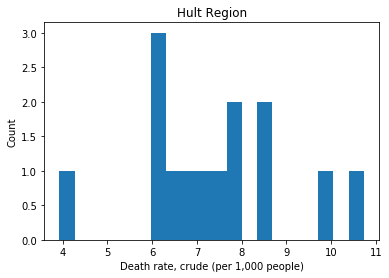

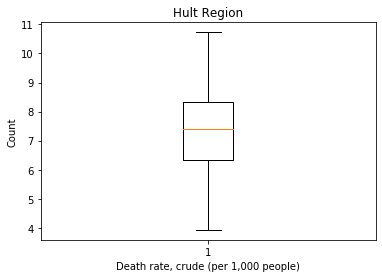

Mean = 7.42


,Hult Region,"Death rate, crude (per 1,000 people)"
6,Eastern Europe,10.731700
7,Middle East & Russia,9.954929
11,Sub-Saharan Africa,8.628182
12,Western Europe,8.466667
4,East/South Africa,7.945667
2,Carribean Islands & Parts of Latin America,7.752688
13,World,7.542404
9,Northern Sub-Saharan Africa,7.244700
10,South America,6.783769
1,Australia & Oceania,6.480071


In [5]:
# Section 1.4 REGIONS: 
# Charts and outliers

sub_mean_regions = raw_copy.groupby(group_by)[variable_Name].mean()

try:
    sub_mean_regions = sub_mean_regions.to_frame().reset_index()
except:
    pass

plt.hist(x = variable_Name, data = sub_mean_regions, bins = 20)
plt.xlabel(variable_Name)
plt.ylabel('Count')
plt.title(group_by)
plt.show()

plt.boxplot(x = variable_Name, data = sub_mean_regions)
plt.xlabel(variable_Name)
plt.ylabel('Count')
plt.title(group_by)
plt.show()

sub_mean_regions = sub_mean_regions.sort_values([variable_Name], axis = 0, ascending = Highest_F_Lowest_T)

print('Mean = ' + str(round(sub_mean_regions[variable_Name].mean(),2)))
sub_mean_regions

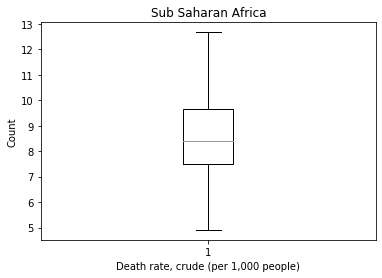

Mean = 8.63


,Country Code,Country Name,"Death rate, crude (per 1,000 people)",Island/Continental
0,CAF,Central African Rep.,12.67,Continental
1,NGA,Nigeria,12.11,Continental
2,SLE,Sierra Leone,12.00,Continental
3,CIV,Cote d'Ivoire,10.26,Continental
4,GNB,Guinea-Bissau,9.80,Continental
5,COD,"Congo, Dem. Rep.",9.69,Continental
6,GNQ,Equatorial Guinea,9.54,Continental
7,CMR,Cameroon,9.50,Continental
8,BEN,Benin,9.02,Continental
9,GIN,Guinea,8.72,Continental


In [6]:
#Section 2.0: Contries in Sub-Saharan Africa for the variable set at the beginning
raw_subSahara = pd.DataFrame.copy(sub_africafull[['Country Name', indicator, 'Island/Continental']])

raw_subSahara = raw_subSahara.dropna(axis=0, subset=[indicator])
plt.boxplot(x = indicator, data = raw_subSahara)
plt.xlabel(variable_Name)
plt.ylabel('Count')
plt.title('Sub Saharan Africa')
plt.show()

#Section 2.1: Detecting outliers
Highest_F_Lowest_T_2 = False
raw_subSahara = round(raw_subSahara.sort_values([indicator], axis = 0, ascending = Highest_F_Lowest_T_2),2).reset_index()
print('Mean = ' + str(round(raw_subSahara[indicator].mean(),2)))

raw_subSahara.columns = ['Country Code','Country Name',variable_Name,'Island/Continental']
raw_subSahara

DRC


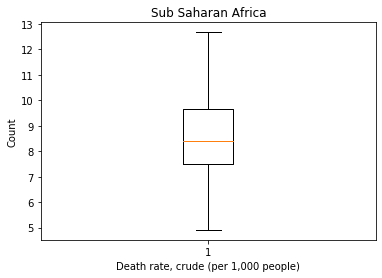

Mean = 8.63


In [7]:
#Section 2.2: Removing outliers

number_outliers = 1
#if number_outliers > 0:
#    raw_subSahara.drop(raw_subSahara.index[:number_outliers], inplace=True)

print(indicator)
raw_subSahara = raw_subSahara.dropna(axis=0, subset=[variable_Name])
plt.boxplot(x = variable_Name, data = raw_subSahara)
plt.xlabel(variable_Name)
plt.ylabel('Count')
plt.title('Sub Saharan Africa')
plt.show()


print('Mean = ' + str(round(raw_subSahara[variable_Name].mean(),2)))

#-------------------------------------END CODE BLOCK---------------------------------------------------------------
###################################################################################################################

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

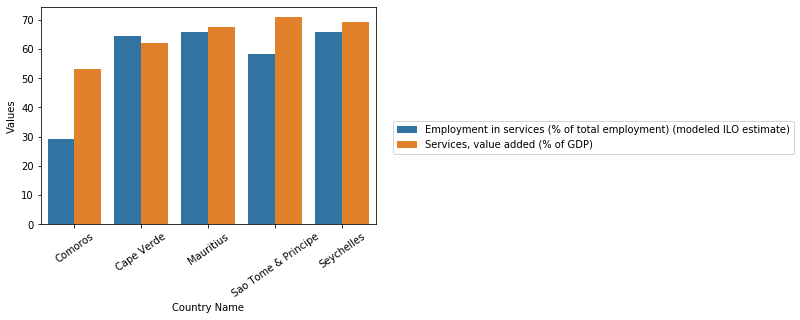

AGO    49.266998
BEN    41.782001
BFA    29.155001
CAF    73.051003
CIV    48.421001
CMR    46.575001
COD    68.795998
COM    57.115002
CPV    13.614000
GAB    37.847000
GHA    34.269001
GIN    66.970001
GMB    29.940001
GNB    68.190002
GNQ    41.481998
LBR    46.426998
MUS     7.171000
NGA    36.807999
SEN    32.494999
SLE    59.243999
STP    23.982000
SYC     7.171000
Name: EAGR, dtype: float64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: Legend does not support [49.26749116514424, 41.78200069843289, 29.15500013055801, 73.05100110910413, 48.42051726424836, 46.574999874591846, 68.79599958789821, 57.114429758536865, 13.61400083976751, 37.8470001220703, 34.269001007080064, 66.96933029860041, 29.94000024852751, 68.18931832158206, 41.48200002601624, 46.42699813842774, 7.171000106396681, 36.8083665386976, 32.49499924178125, 59.24399948120117, 23.982000350952127, 7.171000106396681] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: Legend does not support [8.248082659136866, 19.23399888545989, 32.63099989641188, 9.013999767036438, 6.271937121142658, 14.121999471244825, 10.397000610265767, 13.854860805474775, 21.907000423698435, 9.9379997253418, 18.611999511718782, 6.71593

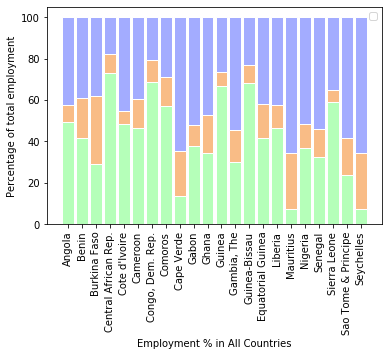

COM    57.115002
CPV    13.614000
MUS     7.171000
STP    23.982000
SYC     7.171000
Name: EAGR, dtype: float64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: Legend does not support [57.114429758536865, 13.61400083976751, 7.171000106396681, 23.982000350952127, 7.171000106396681] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: Legend does not support [13.854860805474775, 21.907000423698435, 27.201000602736443, 17.69000053405762, 27.201000602736443] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: Legend does not support [29.03070943598836, 64.47899873653407, 65.62799929086688, 58.32799911499027, 65.62799929086688] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/le

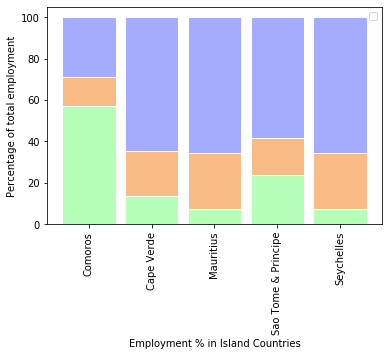

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: Legend does not support [31.44784709473234, 6.958925696707525, 3.512176239088035, 12.319079294633974, 2.310330904840367] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: Legend does not support [12.858413956998207, 21.053690226855835, 20.007543461754153, 15.415380310106555, 13.66232169603889] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: UserWarning: Legend does not support [55.693738948269456, 71.98738407643663, 76.48028029915781, 72.26554039525948, 84.02734739912074] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/le

COM    29.938753
CPV     5.994891
MUS     3.095794
STP    12.080373
SYC     1.907348
Name: AGR, dtype: float64


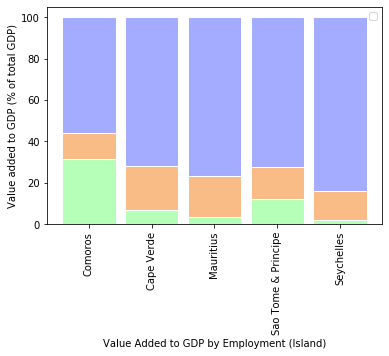

<Figure size 432x288 with 0 Axes>

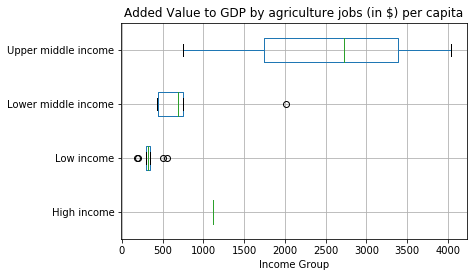

    Country Name  High outliers value         Income Group
AGO       Angola          2017.884092  Lower middle income
     Country Name  Low outliers value Income Group
BFA  Burkina Faso          187.186891   Low income
GMB   Gambia, The          201.430496   Low income
      Country Name  High outliers value Income Group
GIN         Guinea           550.259993   Low income
GNB  Guinea-Bissau           502.373182   Low income


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

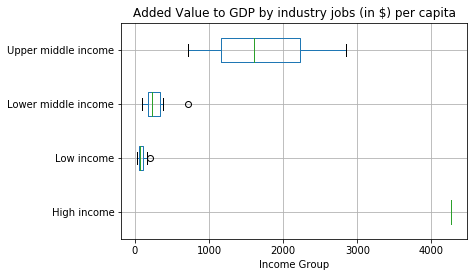

    Country Name  High outliers value         Income Group
CPV   Cape Verde           721.910362  Lower middle income
     Country Name  High outliers value Income Group
BEN         Benin           159.147843   Low income
BFA  Burkina Faso           209.504215   Low income


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

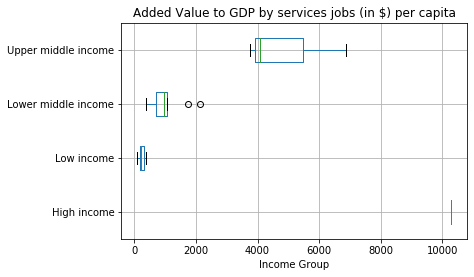

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


    Country Name  High outliers value         Income Group
AGO       Angola          1740.065218  Lower middle income
CPV   Cape Verde          2124.802869  Lower middle income


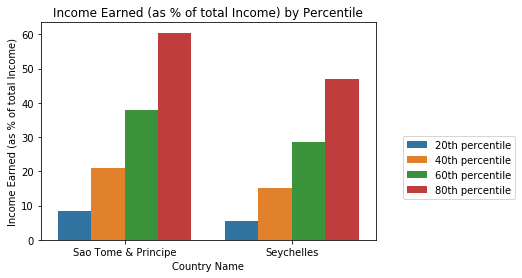

,Country Name,Poverty headcount ratio at national poverty lines (% of population),GINI,Income Group,Income share held by highest 20%,GDP growth (annual %)
SYC,Seychelles,39.3,46.8,High income,53.0,4.332388


<Figure size 432x288 with 0 Axes>

In [8]:
#-------------------------------------START CODE BLOCK-------------------------------------------------------------
###################################################################################################################

#ANALYSIS ON AGRICULTURE -------------------------------------------------------------------------------------

#Subset Island Countries -------
islanddata = sub_africafull[sub_africafull['Island/Continental']=='Island']

#Graph the %of employement vs the %value added to GDP -----------------------------------------------------------
headerlist = ['Country Name','Values','Indicator']
islanddata1 = islanddata[['Country Name','ESVC']]
islanddata1['Indicator'] = indicatordict['ESVC']['Indicator Name']
islanddata1.columns = headerlist

SVCvalues = islanddata['SVCVA'].values.tolist()
islanddata2 = islanddata[['Country Name']]
islanddata2['Indicator'] = indicatordict['SVCVA']['Indicator Name']
islanddata2['Values'] = SVCvalues
islanddata3 = islanddata1.append(islanddata2, ignore_index=True)

ax = sns.barplot(x="Country Name", y="Values", hue="Indicator", data=islanddata3)
plt.xticks(rotation=35)
plt.legend(loc=9,bbox_to_anchor=(1.4, 0., 0.5, 0.5))
plt.show()
plt.clf()


islanddataincome = islanddata[['Country Name','Income Group']]
#Make stacked bar of Employment in three Sector --------------------------------------------------------------
employmentlist = ['EAGR','EIND','ESVC'] #Employment in Agriculture, Industry, Services
alllist = sub_africafull.iloc[:,1].values.tolist()
plotstackedbar(employmentlist,alllist,sub_africafull,"Employment % in All Countries")
plot = plt.ylabel('Percentage of total employment')
plot = plt.legend
plt.show()
plt.clf() #plt.clf() clears the entire current figure with all its axes

#Make stacked bar of Employment in three Sector --------------------------------------------------------------
employmentlist = ['EAGR','EIND','ESVC'] #Employment in Agriculture, Industry, Services
islandlist = (sub_africafull[sub_africafull['Island/Continental']=='Island']).iloc[:,1].values.tolist()
plotstackedbar(employmentlist,islandlist,islanddata,"Employment % in Island Countries")
plot = plt.ylabel('Percentage of total employment')
plot = plt.legend
plt.show()
plt.clf() #plt.clf() clears the entire current figure with all its axes

#Make stacked bar of Value Added to GDP by Sector ------------------------------------------------------------
valueaddedlist = ['AGR','IV','SVCVA'] #Value added to GDP by Agriculture, Industry, Services
plotstackedbar(valueaddedlist,islandlist,islanddata,"Value Added to GDP by Employment (Island)")
plot = plt.ylabel('Value added to GDP (% of total GDP)')
plot = plt.legend
plt.show()
#plt.savefig('Value added to GDP (% of total GDP).jpg')
plt.clf() #plt.clf() clears the entire current figure with all its axes

#Boxplots for the GDP for each sector ---------------------------------------------------------------------------------
GDP = pd.DataFrame.to_numpy(sub_africafull['GDP'])
AgricultureGDP = pd.DataFrame.to_numpy(sub_africafull['EAGR'])
IndustryGDP = pd.DataFrame.to_numpy(sub_africafull['EIND'])
ServicesGDP = pd.DataFrame.to_numpy(sub_africafull['ESVC'])
Population = pd.DataFrame.to_numpy(sub_africafull['POP'])
#GDP = pd.DataFrame.copy(sub_africafull[sub_africafull['GDP']])
GDPbyAGR = (GDP*AgricultureGDP/100)/Population
GDPbyIND = (GDP*IndustryGDP/100)/Population
GDPbySVC = (GDP*ServicesGDP/100)/Population
#GDPbyAGR1 = GDPbyAGR.tolist()
sub_africafull['GDPbyAGR'] = GDPbyAGR.tolist()
sub_africafull['GDPbyIND'] = GDPbyIND.tolist()
sub_africafull['GDPbySVC'] = GDPbySVC.tolist()

#AGRICULTURE ANALYSIS ----------------------------------------------------------------------
sub_africafull.boxplot(column = ['GDPbyAGR'],by = 'Income Group',vert =False,meanline = True, showmeans = False)
plt.title('Added Value to GDP by agriculture jobs (in $) per capita')
plt.suptitle("")
plt.show()
plt.clf()

#Lower middle income-----
agriculture = pd.DataFrame.copy(sub_africafull[sub_africafull['Income Group']=='Lower middle income'])
(lowoutliers,highoutliers) = findoutliers(agriculture,'GDPbyAGR','Income Group','Lower middle income')
print(highoutliers)

#Low income-----
agriculture = pd.DataFrame.copy(sub_africafull[sub_africafull['Income Group']=='Low income'])
(lowoutliers,highoutliers) = findoutliers(agriculture,'GDPbyAGR','Income Group','Low income')
print(lowoutliers)
print(highoutliers)

#INDUSTRY ANALYSIS ----------------------------------------------------------------------
sub_africafull.boxplot(column = ['GDPbyIND'],by = 'Income Group',vert =False,meanline = True, showmeans = False)
plt.title('Added Value to GDP by industry jobs (in $) per capita')
plt.suptitle("")
plt.show()
plt.clf()

#Lower middle income-----
industry = pd.DataFrame.copy(sub_africafull[sub_africafull['Income Group']=='Lower middle income'])
(lowoutliers,highoutliers) = findoutliers(industry,'GDPbyIND','Income Group','Lower middle income')
print(highoutliers)

#Low income-----
industry = pd.DataFrame.copy(sub_africafull[sub_africafull['Income Group']=='Low income'])
(lowoutliers,highoutliers) = findoutliers(industry,'GDPbyIND','Income Group','Low income')
print(highoutliers)

#SERVICES ANALYSIS ----------------------------------------------------------------------
sub_africafull.boxplot(column = ['GDPbySVC'],by = 'Income Group',vert =False,meanline = True, showmeans = False)
plt.title('Added Value to GDP by services jobs (in $) per capita')
plt.suptitle("")
plt.show()
plt.clf()

#Lower middle income-----
services = pd.DataFrame.copy(sub_africafull[sub_africafull['Income Group']=='Lower middle income'])
(lowoutliers,highoutliers) = findoutliers(services,'GDPbySVC','Income Group','Lower middle income')
print(highoutliers)

#Subset Continental Countries -------
continentaldata = sub_africafull[sub_africafull['Island/Continental']=='Continental']
continentallist = (sub_africafull[sub_africafull['Island/Continental']=='Continental']).iloc[:,1].values.tolist()

#Income Inequality ------------------------------------------------------------------------------------------------
first20 = pd.DataFrame.to_numpy(sub_africafull['ISL2'])
second20 = pd.DataFrame.to_numpy(sub_africafull['IS22'])
third20 = pd.DataFrame.to_numpy(sub_africafull['IS32'])
fourth20 = pd.DataFrame.to_numpy(sub_africafull['IS42'])

percentile40th = first20 + second20
percentile60th = percentile40th + third20
percentile80th = percentile60th + fourth20

sub_africafull['Income20percentile'] = first20.tolist()
sub_africafull['Income40percentile'] = percentile40th.tolist()
sub_africafull['Income60percentile'] = percentile60th.tolist()
sub_africafull['Income80percentile'] = percentile80th.tolist()

incomedata = pd.DataFrame.copy(sub_africafull[['Country Code','Country Name']])
headerlist = ['Country Code','Country Name','Values','Percentile']
incomedata['Values'] = first20.tolist()
incomedata['Percentile'] = '20th percentile'
incomedata.columns = headerlist

incomedata1 = pd.DataFrame.copy(sub_africafull[['Country Code','Country Name']])
incomedata1['Values'] = percentile40th.tolist()
incomedata1['Percentile'] = '40th percentile'
incomedatafull = incomedata.append(incomedata1,ignore_index=True)

incomedata2 = pd.DataFrame.copy(sub_africafull[['Country Code','Country Name']])
incomedata2['Values'] = percentile60th.tolist()
incomedata2['Percentile'] = '60th percentile'
incomedatafull = incomedatafull.append(incomedata2,ignore_index=True)

incomedata3 = pd.DataFrame.copy(sub_africafull[['Country Code','Country Name']])
incomedata3['Values'] = percentile80th.tolist()
incomedata3['Percentile'] = '80th percentile'
incomedatafull = incomedatafull.append(incomedata3,ignore_index=True)

#Compare income between two countries -------------------------------------------------------------------------
incomelist = ['STP','SYC']
compareincome = incomedatafull[incomedatafull['Country Code'].isin(incomelist)]
ax = sns.barplot(x="Country Name", y="Values", hue="Percentile", data=compareincome)
plt.ylabel('Income Earned (as % of total Income)')
plt.title('Income Earned (as % of total Income) by Percentile')
plt.legend(loc=9,bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()
plt.clf()


#Analyze GINI and POV ------------------------------------------------------------------------------
GINIindex = sub_africafull[['Country Name','GINI','Income Group','ISH2']].sort_values('GINI', ascending=0)
GINIindex.columns = ['Country Name','GINI','Income Group',indicatordict['ISH2']['Indicator Name']]
GINIindex.head(3) #Countries with highest GINI


POVindex = sub_africafull[['Country Name','POVNAT','Income Group','ISH2','GDPG']].sort_values('POVNAT', ascending=0)
POVindex.columns = ['Country Name',indicatordict['POVNAT']['Indicator Name'],'Income Group',indicatordict['ISH2']['Indicator Name'],indicatordict['GDPG']['Indicator Name']]
POVindex.head(3) #Countries with highest Poverty Rate


#AGRICULTURE CORREL ---------------------------------------------------------------------
agriculturecorr = pd.DataFrame.copy(corrmatrix[['EAGR']])
agriculturecorr = agriculturecorr[agriculturecorr['EAGR']>.5].sort_values('EAGR', ascending=0)
agriculturelist = agriculturecorr.index.values.tolist()
agriculturecorr['Indicator'] = agriculturelist

headerlist = []
for item in agriculturelist:
    headerlist.append(indicatordict[item]['Indicator Name'])

agriculturecorr.columns = [indicatordict['EAGR']['Indicator Name'],'Indicator']
agriculturecorr.index = headerlist
agriculturecorr

#GINI CORREL ---------------------------------------------------------------------
ginicorr = pd.DataFrame.copy(corrmatrix[['GINI']])
ginicorr = ginicorr[ginicorr['GINI']>.01].sort_values('GINI', ascending=0)
ginilist = ginicorr.index.values.tolist()
ginicorr['Indicator'] = ginilist

headerlist = []
for item in ginilist:
    headerlist.append(indicatordict[item]['Indicator Name'])

ginicorr.columns = [indicatordict['GINI']['Indicator Name'],'Indicator']
ginicorr.index = headerlist

giniindex1 = sub_africafull[['Country Name','POVNAT','GINI','Income Group','ISH2','GDPG']].sort_values('POVNAT', ascending=0)
giniindex1 = giniindex1[giniindex1['Country Name']=='Seychelles']
giniindex1.columns = ['Country Name',indicatordict['POVNAT']['Indicator Name'],'GINI','Income Group',indicatordict['ISH2']['Indicator Name'],indicatordict['GDPG']['Indicator Name']]
giniindex1 #Countries with highest Poverty Rate

#-------------------------------------END CODE BLOCK--------------------------------------------------------------
###################################################################################################################

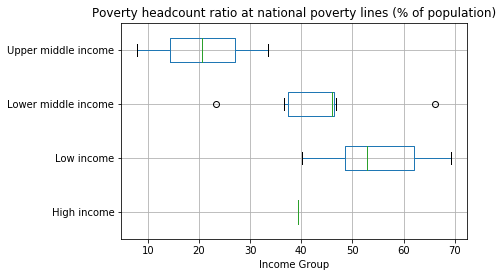

    Country Name  Low outliers value         Income Group
GHA        Ghana                23.4  Lower middle income
            Country Name  High outliers value         Income Group
STP  Sao Tome & Principe                 66.2  Lower middle income


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Figure size 432x288 with 0 Axes>

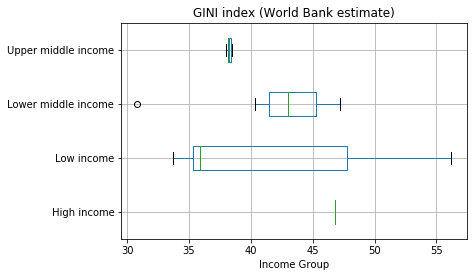

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


            Country Name  Low outliers value         Income Group
STP  Sao Tome & Principe                30.8  Lower middle income


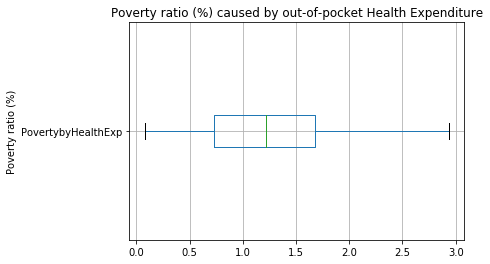

      Country Name  High outliers value         Income Group
CIV  Cote d'Ivoire             2.668034  Lower middle income
NGA        Nigeria             2.937027  Lower middle income
         Country Name  Low outliers value         Income Group
COD  Congo, Dem. Rep.            0.078625           Low income
CPV        Cape Verde            0.186048  Lower middle income


<Figure size 432x288 with 0 Axes>

In [9]:
#-------------------------------------START CODE BLOCK-------------------------------------------------------------
###################################################################################################################

sub_africafull.boxplot(column = ['POVNAT'],by = 'Income Group',vert =False,meanline = True, showmeans = False)
plt.title(indicatordict['POVNAT']['Indicator Name'])
plt.suptitle("")
plt.show()
plt.clf()

poverty = pd.DataFrame.copy(sub_africafull[sub_africafull['Income Group']=='Lower middle income'])
(lowoutliers,highoutliers) = findoutliers(poverty,'POVNAT','Income Group','Lower middle income')
print(lowoutliers)
print(highoutliers)

sub_africafull.boxplot(column = ['GINI'],by = 'Income Group',vert =False,meanline = True, showmeans = False)
plt.title(indicatordict['GINI']['Indicator Name'])
plt.suptitle("")
plt.show()
plt.clf()

GINI = pd.DataFrame.copy(sub_africafull[sub_africafull['Income Group']=='Lower middle income'])
(lowoutliers,highoutliers) = findoutliers(GINI,'GINI','Income Group','Lower middle income')
print(lowoutliers)
#highoutliers

#People pushed below the poverty line ----------------------------------------------------------------------------
numPoverty = pd.DataFrame.to_numpy(sub_africafull['POV31'])
Population = pd.DataFrame.to_numpy(sub_africafull['POP'])
PovertybyHealthExp = numPoverty/Population*100 #percent of people pushed below the $3.1 poverty line by out-of-pocket
sub_africafull['PovertybyHealthExp'] = PovertybyHealthExp.tolist()

sub_africafull.boxplot(column = ['PovertybyHealthExp'],vert =False,meanline = True, showmeans = False)
plt.ylabel('Poverty ratio (%)')
plt.title('Poverty ratio (%) caused by out-of-pocket Health Expenditure')
plt.suptitle("")
plt.show()
plt.clf()

povertybyhealthcare = pd.DataFrame.copy(sub_africafull)
(lowoutliers,highoutliers) = findoutliers1(povertybyhealthcare,'PovertybyHealthExp')
print(highoutliers)
print(lowoutliers)

#-------------------------------------END CODE BLOCK--------------------------------------------------------------
###################################################################################################################

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

            Country Name           Indicator      Values
0                 Angola    Population, male  14749309.0
1   Central African Rep.    Population, male   2277878.0
2          Cote d'Ivoire    Population, male  12343864.0
3               Cameroon    Population, male  12279485.0
4       Congo, Dem. Rep.    Population, male  40610874.0
5                Liberia    Population, male   2361024.0
6           Sierra Leone    Population, male   3733927.0
7                 Angola  Population, female  15067439.0
8   Central African Rep.  Population, female   2318150.0
9          Cote d'Ivoire  Population, female  12093605.0
10              Cameroon  Population, female  12286560.0
11      Congo, Dem. Rep.  Population, female  40787890.0
12               Liberia  Population, female   2341204.0
13          Sierra Leone  Population, female   3754504.0


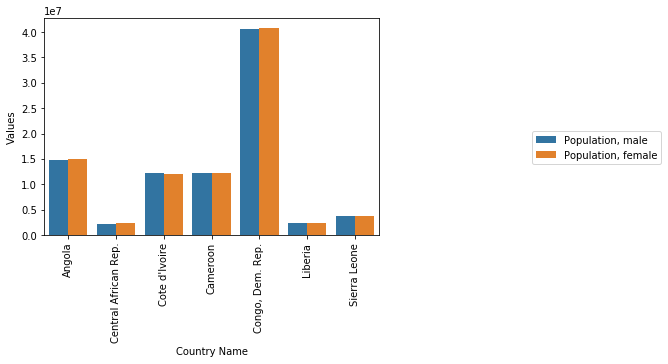

<Figure size 432x288 with 0 Axes>

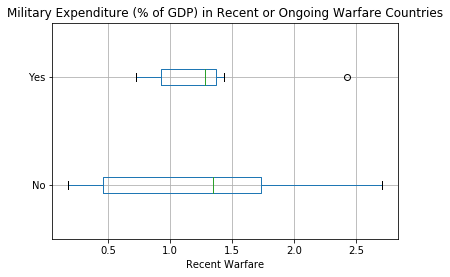

AGO    False
BEN    False
BFA    False
CAF    False
CIV    False
CMR    False
COD    False
COM     True
CPV    False
GAB    False
GHA    False
GIN    False
GMB     True
GNB     True
GNQ     True
LBR    False
MUS    False
NGA    False
SEN    False
SLE    False
STP     True
SYC    False
dtype: bool
           ME Recent Warfare
AGO  2.421113            Yes
BEN  1.264103             No
BFA  1.427258             No
CAF  1.435513            Yes
CIV  1.277401            Yes
CMR  1.306176            Yes
COD  0.737512            Yes
COM       NaN             No
CPV  0.537770             No
GAB  1.810489             No
GHA  0.401719             No
GIN  2.708320             No
GMB       NaN             No
GNB       NaN             No
GNQ       NaN             No
LBR  0.728271            Yes
MUS  0.178593             No
NGA  0.430671             No
SEN  1.886341             No
SLE  1.114004            Yes
STP       NaN             No
SYC  1.480933             No


<Figure size 432x288 with 0 Axes>

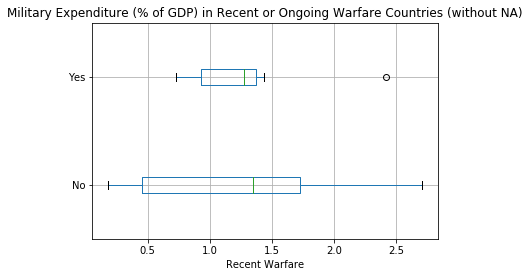

<Figure size 432x288 with 0 Axes>

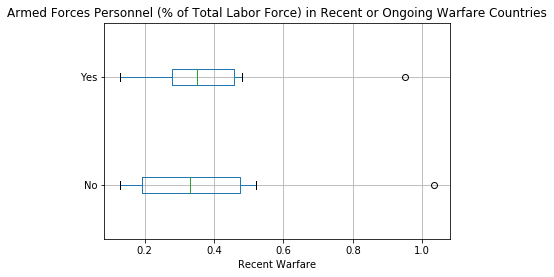

          AFP
GAB  1.034508
AGO  0.951562
GNB  0.522133
MUS  0.497461
COD  0.479937
SEN  0.468033
CAF  0.435970
CPV  0.381573
NGA  0.364330
SLE  0.352069
CIV  0.333128
GIN  0.299108
BEN  0.263318
CMR  0.223849
GNQ  0.203472
BFA  0.156566
GMB  0.136611
GHA  0.130853
LBR  0.129505
COM       NaN
STP       NaN
SYC       NaN


<Figure size 432x288 with 0 Axes>

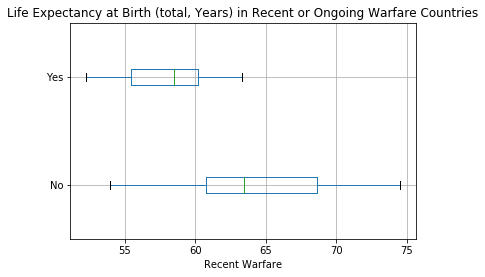

            LE
MUS  74.514634
SYC  74.300000
CPV  72.570000
STP  69.933000
SEN  67.380000
GAB  65.839000
COM  63.912000
GHA  63.463000
LBR  63.295000
GMB  61.440000
BEN  61.174000
BFA  60.768000
GIN  60.706000
AGO  60.379000
COD  60.026000
CMR  58.511000
GNQ  58.061000
GNB  57.673000
CIV  57.017000
NGA  53.950000
SLE  53.895000
CAF  52.240000


<Figure size 432x288 with 0 Axes>

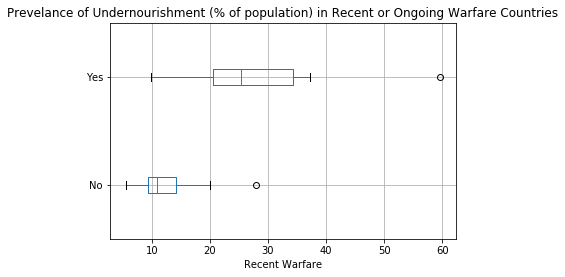

      PUN
CAF  59.6
LBR  37.2
GNB  28.0
SLE  25.6
AGO  25.0
BFA  20.0
CIV  19.0
GIN  16.5
NGA  13.4
CPV  12.6
SEN  11.3
GAB  10.5
GMB  10.2
BEN  10.1
CMR   9.9
STP   7.0
MUS   6.5
GHA   5.5
COD   NaN
COM   NaN
GNQ   NaN
SYC   NaN


<Figure size 432x288 with 0 Axes>

In [11]:
#-------------------------------------START CODE BLOCK-------------------------------------------------------------
###################################################################################################################


## Data Prep - Anomaly Detection and Treatment: Missing Values --------------
sub_africainfra = sub_africafull[['Country Code',
                                  'Country Name',
                                  'ATE',
                                  'ATER',
                                  'ATEU',
                                  'AFP',
                                  'LE',
                                  'ME',
                                  'MCS',
                                  'POPD',
                                  'POPG',
                                  'POPLC',
                                  'POPS',
                                  'POPF',
                                  'POPM',
                                  'POPR',
                                  'POPU',
                                  'POPUG',
                                  'Income Group',
                                  'Island/Continental',
                                  'Recent Warfare']]

## Graph the Population Female vs the Population Male in Warfare Countries -----------------------

#Subset Warfare and peace countries
warfaredata    = sub_africainfra[sub_africainfra['Recent Warfare'] == 'Yes']
peacedata      = sub_africainfra[sub_africainfra['Recent Warfare'] == 'No']

headerlist                  = ['Country Name','Values','Indicator']
malefemaledata              = warfaredata[['Country Name','POPM']]
malefemaledata['Indicator'] = indicatordict['POPM']['Indicator Name']
malefemaledata.columns      = headerlist

popfvalues                   = warfaredata['POPF'].values.tolist()
malefemaledata1              = warfaredata[['Country Name']]
malefemaledata1['Indicator'] = indicatordict['POPF']['Indicator Name']
malefemaledata1['Values']    = popfvalues
malefemaledata2              = malefemaledata.append(malefemaledata1, ignore_index=True)
print(malefemaledata2)

ax = sns.barplot(x="Country Name", y="Values", hue="Indicator", data=malefemaledata2)
plt.xticks(rotation=90)
plt.legend(loc=9,bbox_to_anchor=(1.4, 0., 0.5, 0.5))
plt.show()
plt.clf()


## Boxplot the Military Expenditure -------------------------------------------
sub_africainfra.boxplot(column = ['ME'],
                       by = 'Recent Warfare',
                       vert = False,
                       meanline = True, 
                       showmeans = False)
plt.title('Military Expenditure (% of GDP) in Recent or Ongoing Warfare Countries')
plt.suptitle("")
plt.show()
plt.clf()

# Checking if NA values fo Military Expenditure affects BOXPLOT ---------------
## Locating and Dropping NA values
MEdata       = sub_africafull[['ME','Recent Warfare']]
print(MEdata.isnull().any(axis=1))
MEdata_dropped = MEdata.dropna()
print(MEdata)
MEdata_dropped
### INSIGHT: Countries with NA in Military Expenditure have not have recent warfare

## Boxplot the Military Expenditure wihtout NAs ------------------------------
MEdata_dropped.boxplot(column = ['ME'],
                       by = 'Recent Warfare',
                       vert = False,
                       meanline = True, 
                       showmeans = False)
plt.title('Military Expenditure (% of GDP) in Recent or Ongoing Warfare Countries (without NA)')
plt.suptitle("")
plt.show()
plt.clf()

## Boxplot the Armed Forces Personnel ----------------------------------------
sub_africainfra.boxplot(column = ['AFP'],
                       by = 'Recent Warfare',
                       vert = False,
                       meanline = True, 
                       showmeans = False)
plt.title('Armed Forces Personnel (% of Total Labor Force) in Recent or Ongoing Warfare Countries')
plt.suptitle("")
plt.show()
plt.clf()

print(sub_africafull[['AFP']].sort_values(by = "AFP", ascending = False)) ##identifying outliers
## Angola and Gabon


## Boxplot the Life Expectancy  ----------------------------------------------
sub_africainfra.boxplot(column = ['LE'],
                       by = 'Recent Warfare',
                       vert = False,
                       meanline = True, 
                       showmeans = False)
plt.title('Life Expectancy at Birth (total, Years) in Recent or Ongoing Warfare Countries')
plt.suptitle("")
plt.show()
plt.clf()

print(sub_africafull[['LE']].sort_values(by = "LE", ascending = False)) ##identifying outliers
## No outliers

## Boxplot Prevelance of Undernourishment (% of population)  ----------------------------------------------
sub_africafull.boxplot(column = ['PUN'],
                       by = 'Recent Warfare',
                       vert = False,
                       meanline = True, 
                       showmeans = False)
plt.title('Prevelance of Undernourishment (% of population) in Recent or Ongoing Warfare Countries')
plt.suptitle("")
plt.show()
plt.clf()

print(sub_africafull[['PUN']].sort_values(by = "PUN", ascending = False)) ##identifying outliers
## Outliers: Central African Republic and Liberia (warfare) and Guinea-Bissau (peace)

#-------------------------------------END CODE BLOCK---------------------------------------------------------------
###################################################################################################################

(16.0, 0.0)

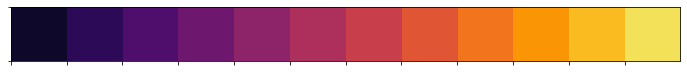

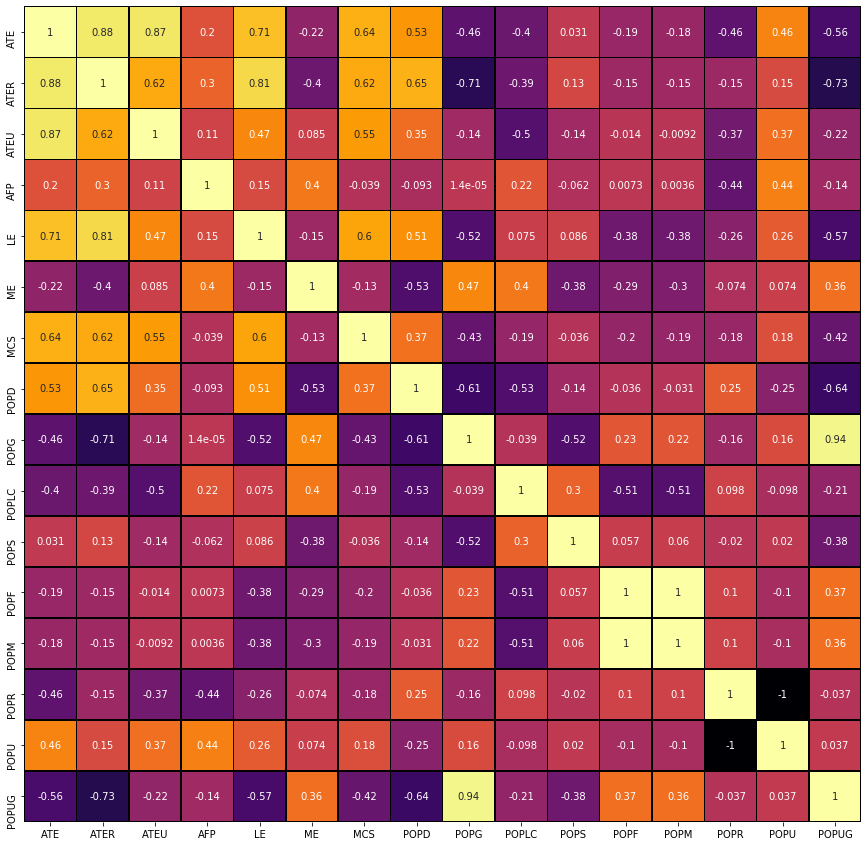

In [10]:
#-------------------------------------START CODE BLOCK-------------------------------------------------------------
###################################################################################################################
## Correlation Analysis  ----------------------------------------------
sub_africainfra = sub_africafull[['Country Code',
                                  'Country Name',
                                  'ATE',
                                  'ATER',
                                  'ATEU',
                                  'AFP',
                                  'LE',
                                  'ME',
                                  'MCS',
                                  'POPD',
                                  'POPG',
                                  'POPLC',
                                  'POPS',
                                  'POPF',
                                  'POPM',
                                  'POPR',
                                  'POPU',
                                  'POPUG',
                                  'Income Group',
                                  'Island/Continental',
                                  'Recent Warfare']]

## Focusing on Indicators of Interest
#SUBSET THE RAW DATA TO GET ONLY THE INDICATORS FOR CORRELATION MATRIX ----------------------------------------------
indicatordata = sub_africa.iloc[:,4:]

# calling correlation matrix
corrmatrix_flagged = sub_africainfra.corr()
#corrmatrix_flagged = corrmatrix_flagged.loc['ATEU'].sort_values(ascending = False)
corrmatrix_flagged

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))

# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))

# creating a heatmap
sns.heatmap(corrmatrix_flagged, ## change correlation matrix for subset 
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
#plt.savefig('Diamond Correlation Heatmap 2.png')
#plt.show()
#-------------------------------------END CODE BLOCK-------------------------------------------------------------
###################################################################################################################

In [12]:
#-------------------------------------START CODE BLOCK-------------------------------------------------------------
###################################################################################################################
#Find highest % of employment ---------------------------------------------------------
highestemployment = pd.DataFrame.copy(sub_africafull[['Country Name','EAGR','EIND','ESVC','Income Group']])

agr = pd.DataFrame.to_numpy(sub_africafull['EAGR'])
ind = pd.DataFrame.to_numpy(sub_africafull['EIND'])
svc = pd.DataFrame.to_numpy(sub_africafull['ESVC'])

k = 0
highestvalueslist = []
highestemploymentlist = []
for i in agr:
    testrange = max(agr[k],ind[k],svc[k])
    if testrange == agr[k]:
        highestvalueslist.append(agr[k])
        highestemploymentlist.append('Agriculture')
    elif testrange == ind[k]:
        highestvalueslist.append(ind[k])
        highestemploymentlist.append('Industry')
    else:
        highestvalueslist.append(svc[k])
        highestemploymentlist.append('Services')
    k += 1

highestemployment['Highest Value'] = highestvalueslist
highestemployment['Highest Sector'] = highestemploymentlist

agriculturehighest = highestemployment[highestemployment['Highest Sector']=='Agriculture'].sort_values('Highest Value', ascending=0)
agriculturehighest[['Country Name','Income Group','Highest Value']]

serviceshighest = highestemployment[highestemployment['Highest Sector']=='Services'].sort_values('Highest Value', ascending=0)
serviceshighest[['Country Name','Income Group','Highest Value']]

#-------------------------------------END CODE BLOCK-------------------------------------------------------------
###################################################################################################################

,Country Name,Income Group,Highest Value
MUS,Mauritius,Upper middle income,65.627998
SYC,Seychelles,High income,65.627998
CPV,Cape Verde,Lower middle income,64.478996
STP,Sao Tome & Principe,Lower middle income,58.327999
GMB,"Gambia, The",Low income,54.297001
SEN,Senegal,Lower middle income,54.153000
GAB,Gabon,Upper middle income,52.215000
NGA,Nigeria,Lower middle income,51.629002
GHA,Ghana,Lower middle income,47.118999
GNQ,Equatorial Guinea,Upper middle income,42.050999
